# Custom Models and Training with TensorFlow

- TF is similar to NumPy but with GPU support
- Supports distributed computing
- Includes a kind of J-I-T compiler that allows it to optimize computations for speed and memory usage by extracting the computation graph from a Python function, optimizing it and then run it efficiently.
- Computation graphs can be exported to a portable format so it can be trained in a TensorFlow model in one environment (e.g. Python on Linux) and run it in another (Java on Android)
- Implements reverse-mode autodiff and has great optimizers such as RMSProp and Nadam to minimize all sots of loss functions

Has many Python API including:
- High-level deep learning API
- Low-level deep learning API
- Autodiff
- Mathematics, inlcuding linear algebra and signal processing
- i/o and preprocessing
- Visualization with TensorBoard
- Deployment and optimization
- Special data structures
- Miscellaneous

TF runs on mobile devices and also supports other languages such as C++, Java, and Swift!

Other notable things about TF:
- TensorFlow Extended: Set of libraries built by Google to productionize TF projects (including tools for data validation, preprocessing, model analysis and serving)
- TensorFlow Hub provides a way to easily download and reuse pretrained neural networks
- TensorFlow Resources for more TF based projects.

## Using TF like NumPy

A tensor is very similar to a NumPy `ndarray`: usually a multidimensional array, but can also hold scalar values too.

### Tensors and Operations

In [2]:
import tensorflow as tf 
t = tf.constant([[1., 2., 3.], [4.,5.,6.]]) #matrix
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
t.shape

TensorShape([2, 3])

In [4]:
t.dtype

tf.float32

In [5]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t+10 #tf.add(t,10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### Tensors and NumPy

Both can be used in conjunction (create a tensor from a NumPy array and vice versa, and even apply TF operations to NumPy arrays and vice versa)

In [12]:
import numpy as np
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Type Conversions

In [16]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [18]:
tf.constant(2.) + tf.constant(40., dtype= tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [19]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

tf.Tensor values are immutable, hence we need to change it to a tf.Variable to have it changeable

In [20]:
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])

In [21]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

tf.Variable acts much like a tf.Tensor, but it can also be modified in place using `assign()` method.

In [22]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [26]:
v[:, 2]. assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [27]:
v.scatter_nd_update(indices=[[0,0],[1,2]], updates = [100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [28]:
# direct assignment will NOT work
v[1] = [7., 8.,9.]

TypeError: 'ResourceVariable' object does not support item assignment

### Other Data Structures

- Sparse tensors (`tf.SparseTensor`): tensors containing mostly zeros

- Tensor arrays (`tf.TensorArray`): list of tensors, with fixed length but can be optionally made extensible. All tensors must have the same shape and data type!

- Ragged tensors (`tf.RaggedTensor`): represents a lists of tensors, with the same rank and data type, but with varying sizes. The dimensions along which the tensor sizes vary are called the *ragged dimensions*.

- String tensors: regular tensors of type `tf.string`. It represents byte strings, not Unicode strings.

- Sets: represented as regular tensors (or sparse tensors). e.g. `tf.constant([[1,2], [3,4]])` represents 2 sets {1,2} and {3,4}. More generally, each set is represented by a vector in the tensor's last axis.

- Queues: Store tensors across multiple steps. Offers various kinds of queues (FIFOQueue, PriorityQueue, RandomShuffleQueue, PaddingFIFOQueue [batch items of different shapes by padding]). They are all under the `tf.queue` package.

## Customizing Models and Training Algorithms

### Custom Loss Functions

Create a function to calculate the *Huber loss* (which is already available under `tf.keras.losses.Huber` class).

Recap: <br>
Huber loss is a hybrid loss function for regression tasks that combines the best of Mean Squared Error (MSE) and Mean Absolute Error (MAE). It uses a threshold (δ) to decide when to switch between MSE-like and MAE-like behavior:

- Small errors (|prediction - true| ≤ δ): Quadratic loss (like MSE).
- Large errors (|prediction - true| > δ): Linear loss (like MAE).

Advantages
1. Robust to Outliers:
- For large errors (> δ), it scales linearly (like MAE), reducing the impact of outliers.
- Avoids MSE’s problem of over-penalizing large errors.
2. Smooth Optimization:
- Continuously differentiable (unlike MAE), making gradient-based optimization (e.g., SGD) stable near zero error.
3. Balanced Behavior:
- Behaves like MSE for small errors, ensuring precise predictions for accurate data.
- Behaves like MAE for large errors, curbing outlier influence.

Disadvantages
1. Hyperparameter Tuning (δ):
- Choosing δ requires trial-and-error. Common values (δ = 1.0, 1.5) may not suit all tasks.
- Too small δ: Too much like MSE (outlier-sensitive).
- Too large δ: Too much like MAE (may underfit subtle patterns).
2. Computational Overhead:
- Requires conditional checks (if-else) per data point, slightly slower than MSE/MAE.
3. Not Fully Outlier-Proof:
- Still assigns linear penalties to extreme outliers (unlike quantile losses, which ignore them).

When to Use It?
- Outliers are present (e.g., sensor noise, corrupted data).
- You want a balance between MSE’s precision and MAE’s robustness.
- Differentiability is critical (e.g., deep networks with gradient-based optimization).

When to Avoid It?
- Classification tasks (use cross-entropy instead).
- Extremely noisy datasets (consider quantile loss).
- Minimal outliers (MSE may suffice).
- High latency constraints (use MAE/MSE for simplicity).

In [1]:
def huber_fn (y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error)
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

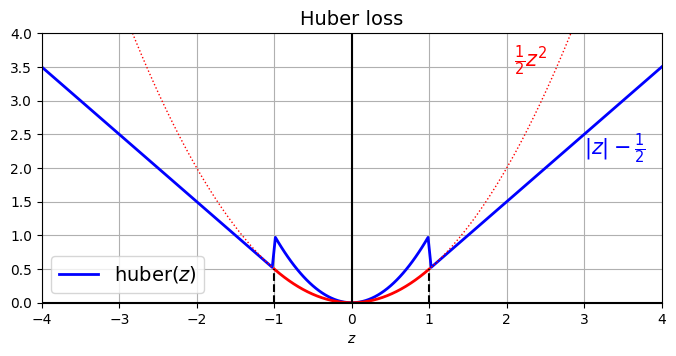

In [4]:
# extra code – shows what the Huber loss looks like

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [5]:
# extra code – loads, splits and scales the California housing dataset, then
#              creates a simple Keras model

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [7]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 0.8285 - mae: 1.1377 - val_loss: 0.4334 - val_mae: 0.6458
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.3462 - mae: 0.5613 - val_loss: 0.3339 - val_mae: 0.5313


## Saving and Loading Models That Contain Custom Components

Saving the model is fine, but when loading, we need to provide a dictionary that maps the function name to the actual function!

In [9]:
model.save("my_model_with_a_custom_loss.keras")  # extra code – saving works fine

In [10]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss.keras",
                                   custom_objects={"huber_fn": huber_fn})

In [11]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.3005 - mae: 0.5019 - val_loss: 0.2909 - val_mae: 0.4850
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.2795 - mae: 0.4752 - val_loss: 0.2732 - val_mae: 0.4645


In [12]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [13]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [14]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 0.2153 - mae: 0.4672 - val_loss: 0.2022 - val_mae: 0.4460
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.2051 - mae: 0.4585 - val_loss: 0.1795 - val_mae: 0.4324


In [15]:
model.save("my_model_with_a_custom_loss_threshold_2.keras")

Note that in this case, we also need to specify the `threshold` value when loading the model (note that the name to use is still "`huber_fn`", which is the name of the function that was given to Keras, not the name of the function that created it)

In [17]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2.keras",
                                   custom_objects={"huber_fn": create_huber(2.0)})

In [18]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 0.1997 - mae: 0.4531 - val_loss: 0.1779 - val_mae: 0.4294
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.1958 - mae: 0.4483 - val_loss: 0.1742 - val_mae: 0.4251


Another was is to create a subclass of the `tf.keras.losses.Loss` and implementing its `get_config()` method

In [19]:
class HuberLoss (tf.keras.losses.Loss):
    # constructor to decide how the handle
    # the individual instance losses.
    # By default it is "AUTO" = "SUM_OVER_BATCH_SIZE"
    def __init__(self, threshold = 1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    
    # takes the labels and predictions and computes
    # all the instance losses and returns them
    def call (self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    # Returns a dictionary mapping each hyperparameter name
    # to its value.
    def get_config(self):
        # calls the parent class' get_config() method
        base_config = super().get_config()
        # then adds the new hyperparameter to this dictionary
        return {**base_config, "threshold": self.threshold}

In [20]:
# extra code – creates another basic Keras model
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [22]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 1.0512 - mae: 1.1438 - val_loss: 0.5086 - val_mae: 0.6718
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.3170 - mae: 0.5816 - val_loss: 0.3527 - val_mae: 0.5571


In [23]:
model.save("my_model_with_a_custom_loss_class.keras")  # extra code – saving works

In [24]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_class.keras",
                                   custom_objects={"HuberLoss": HuberLoss})

In [25]:
# extra code – shows that loading worked fine, the model can be used normally
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2612 - mae: 0.5244 - val_loss: 0.2689 - val_mae: 0.4982
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.2328 - mae: 0.4929 - val_loss: 0.2207 - val_mae: 0.4657


In [26]:
model.loss.threshold  # extra code – the treshold was loaded correctly

2.0

## Custom Activation Functions, Initializers, Regularizers and Constraints

In [114]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer (shape, dtype = tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev = stddev, dtype = dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [28]:
layer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [29]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

## Custom Metrics

Take note the difference between Losses (used by gradient descent to train a model, MUST be differentiable and should not be 0 everywhere) vs metrics (used to evaluate a model, more easily interpretable and can be nondifferentiable or have zero gradients everywhere).

In [30]:
# extra code – once again, lets' create a basic Keras model
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [32]:
# extra code – train the model with our custom metric
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - huber_fn: 1.0788 - loss: 2.5942
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - huber_fn: 0.3403 - loss: 0.7644


### Streaming Metrics

In [35]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.800000011920929>

In [36]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
# the precision of up to the 2nd batch, not the 2nd batch itself1
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [38]:
precision.variables

[<Variable path=precision_2/true_positives, shape=(1,), dtype=float32, value=[4.]>,
 <Variable path=precision_2/false_positives, shape=(1,), dtype=float32, value=[4.]>]

In [39]:
precision.reset_state()

To define your own custom streaming metric, create a subclass of the `tf.keras.metrics.Metric` class.

Note that when we use metric as a function, the `update_state()` method gets called first, then the `result()` method is called, and its output is returned.

In [ ]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold = 1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        # use add_weight to create the variables
        # needed to keep track of the metric's state over multiple batches
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer ="zeros")
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count
    
    def get_config(self):
        base_config=super().get_config()
        return{**base_config, "threshold":self.threshold}

In [41]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [42]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [43]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [44]:
m.variables

[<Variable path=huber_metric/total, shape=(), dtype=float32, value=21.0>,
 <Variable path=huber_metric/count, shape=(), dtype=float32, value=3.0>]

In [45]:
m.reset_state()
m.variables

[<Variable path=huber_metric/total, shape=(), dtype=float32, value=0.0>,
 <Variable path=huber_metric/count, shape=(), dtype=float32, value=0.0>]

Check that the `HuberMetric` class works well

In [46]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])

In [48]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - huber_metric_1: 1.0512 - loss: 1.0512
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - huber_metric_1: 0.3170 - loss: 0.3170


In [49]:
model.save("my_model_with_a_custom_metric.keras")

Note that now, when we load the model back, we have to define both the loss and metric!

In [50]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric.keras",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)

In [51]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - huber_metric_1: 0.2612 - loss: 0.2612
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - huber_metric_1: 0.2328 - loss: 0.2328


More simply, we could have created the class like so

In [52]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

In [53]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [54]:
model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

In [55]:
np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - HuberMetric: 1.0599 - loss: 0.5274
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - HuberMetric: 0.3215 - loss: 0.1598


In [56]:
(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())

(0.3256884217262268, np.float64(0.32568849524955656))

In [59]:
model.save("my_model_with_a_custom_metric_v2.keras")

In [60]:
model = tf.keras.models.load_model("my_model_with_a_custom_metric_v2.keras",
                                   custom_objects={"HuberMetric": HuberMetric})

In [61]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - HuberMetric: 0.2627 - loss: 0.2262
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - HuberMetric: 0.2298 - loss: 0.1999


## Custom Layers

When wanting to build an architecture with an exotic layer which TF does not have, OR to build a very repetitive architecture, in which a particular block of layers is repeated many times and it would be convenient to treat each block as a single layer.

The exponential layer is sometimes used in the output layer of a regression model when the values to predict have very different scales. In fact this function is one of the standard activation functions in Keras, so it can also be used by `activation="exponential"`

In [64]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [65]:
# extra code – like all layers, it can be used as a function:
exponential_layer(tf.constant([-1., 0., 1.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [66]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5


/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 1.2350 - val_loss: 0.4393
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.6130 - val_loss: 0.4048
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.5172 - val_loss: 0.3942
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.4498 - val_loss: 0.3699
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.5445 - val_loss: 0.3770
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3923


0.3950682282447815

Alternatively, it's often preferable to replace the targets with the logarithm of the target and use no activation function in the output layer.

To build a custom stateful layer, create a subclass of the `tf.keras.layers.Layer` class!

In [69]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    # called the first time the layer is used.
    def build (self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape = [self.units], initializer = "zeros")
    
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units":self.units,
                "activation": tf.keras.activations.serialize(self.activation)}

In [70]:
# extra code – shows that a custom layer can be used normally
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("my_model_with_a_custom_layer.keras")

Epoch 1/2


/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_1739/138382502.py:3: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 4.2221 - val_loss: 1.7553
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.7143 - val_loss: 0.6906
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.5624


In [71]:
# extra code – shows how to load a model with a custom layer
model = tf.keras.models.load_model("my_model_with_a_custom_layer.keras",
                                   custom_objects={"MyDense": MyDense})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 0.5586 - val_loss: 0.4317
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.4826 - val_loss: 0.4608


For layers with multiple inputs

In [72]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape)  # extra code
        return X1 + X2, X1 * X2, X1 / X2

In [73]:
# extra code – tests MyMultiLayer with symbolic inputs
inputs1 = tf.keras.layers.Input(shape=[2])
inputs2 = tf.keras.layers.Input(shape=[2])
MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


(<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_47>,
 <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_48>,
 <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_49>)

Note that the `call()` method receives symbolic inputs, and it returns symbolic outputs. The shapes are only partially specified at this stage: we don't know the batch size, which is why the first dimension is `None`.

We can also pass actual data to the custom layer:

In [74]:
# extra code – tests MyMultiLayer with actual data 
X1, X2 = np.array([[3., 6.], [2., 7.]]), np.array([[6., 12.], [4., 3.]]) 
MyMultiLayer()((X1, X2))

X1.shape:  (2, 2)  X2.shape:  (2, 2)


(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

For layers that needs to have different behavior during training and testing (e.g. uses Dropout or BatchNormalization layers), then we must add a `training` argument to the `call()` method and use this argument to decide what to do.

In [79]:
# create a layer that adds Gaussian noise during training
# (for regularization) but does nothing during testing

class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
    
    def call (self, X, training=False):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

In [80]:
# extra code – tests MyGaussianNoise
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyGaussianNoise(stddev=1.0, input_shape=input_shape),
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2


/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_1739/1095381717.py:6: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 2.7619 - val_loss: 25.1369
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.3951 - val_loss: 14.9793
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 1.1219


1.1244221925735474

## Custom Models

In [81]:
# Suppose we want to build a model with a ResidualBlock
# containing a skip connection
# The inputs go through the 1st dense layer, then through a
# ResidualBlock composed of 2 dense layers and an addition operation
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [82]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    # extra code - to be able to save and load the model below
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "output_dim": self.output_dim}

In [83]:
# extra code – shows that the model can be used normally
tf.keras.utils.set_random_seed(42)
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model.keras")

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 123.5810
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 1.5416
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 1.1640


In [84]:
# extra code – the model can be loaded and you can continue training or use it
#              to make predictions
model = tf.keras.models.load_model(
    "my_custom_model.keras",
    custom_objects={"ResidualRegressor": ResidualRegressor}
)
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 1.0556
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.9670
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.700629 ],
       [1.111954 ],
       [3.8838222]], dtype=float32)

In [85]:
# Defining the model via sequential API
tf.keras.utils.set_random_seed(42)
block1 = ResidualBlock(2, 30)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])

# Losses and Metrics Based on Model Internals

When we want to define the losses based on other parts of the model, such as the weights / activation of its hidden layers (useful for regularization purposes / to monitor some internal aspect of the model).

To define this, we need to compute it based on any part of the model you want, then pass the result to the `add_loss()` method.

In [90]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [91]:
# extra code
tf.keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - loss: 1.1051
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.5082
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.4392
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.3985
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.3805
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


# Computing Gradients using Autodiff

In [92]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [93]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [94]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Rather than calling `f()` at least once per parameter, we can instead use reverse-mode autodiff!

In [ ]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)

# create the tf.GradientTape context to automatically
# record every operation that involves a variable
with tf.GradientTape() as tape:
    z = f(w1, w2)

# compute the gradients of the result Z with regards
# to both variables
gradients = tape.gradient(z, [w1, w2])

In [96]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [97]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
try:
    dz_dw2 = tape.gradient(z, w2)  # raises a RuntimeError!
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


To call the `gradient()` more than once, use the `persistent=True` argument. Then delete it once you are done to free resources.

In [98]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2)  # returns tensor 10.0, works fine now!
del tape

In [99]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

By default, the tape will only trakc operations involving VARIABLES, so using constants will not work, as seen below.

In [100]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [101]:
gradients

[None, None]

However, you can force the tape to watch any tensors you like.

In [102]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [103]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [104]:
# extra code – if given a vector, tape.gradient() will compute the gradient of
#              the vector's sum.
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [105]:
# extra code – shows that we get the same result as the previous cell
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    z = z1 + z2 + z3

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [106]:
# extra code – shows how to compute the jacobians and the hessians
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [107]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [108]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

To avoid backpropagation through some part of the neural network.

In [109]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)  # same result as without stop_gradient()

gradients = tape.gradient(z, [w1, w2])

In [110]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

Numerical issue when computing gradients where the result is more than 32-bit floats can handle.

In [111]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

To solve this, it's often a good idea to add a tiny value to x when computing its square root.

In [112]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [115]:
x = tf.Variable([1.0e30])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [116]:
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

Here is the proof that this equation is equal to log(1 + exp(_z_)):
* softplus(_z_) = log(1 + exp(_z_))
* softplus(_z_) = log(1 + exp(_z_)) - log(exp(_z_)) + log(exp(_z_)) ; **just adding and subtracting the same value**
* softplus(_z_) = log\[(1 + exp(_z_)) / exp(_z_)\] + log(exp(_z_)) ; **since log(_a_) - log(_b_) = log(_a_ / _b_)**
* softplus(_z_) = log\[(1 + exp(_z_)) / exp(_z_)\] + _z_ ; **since log(exp(_z_)) = _z_**
* softplus(_z_) = log\[1 / exp(_z_) + exp(_z_) / exp(_z_)\] + _z_ ; **since (1 + _a_) / _b_ = 1 / _b_ + _a_ / _b_**
* softplus(_z_) = log\[exp(–_z_) + 1\] + _z_ ; **since 1 / exp(_z_) = exp(–z), and exp(_z_) / exp(_z_) = 1**
* softplus(_z_) = softplus(–_z_) + _z_ ; **we recognize the definition at the top, but with –_z_**
* softplus(_z_) = softplus(–|_z_|) + max(0, _z_) ; **if you consider both cases, _z_ < 0 or _z_ ≥ 0, you will see that this works**

In [117]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):  # grads = backprop'ed from upper layers
        return grads * (1 - 1 / (1 + tf.exp(z)))  # stable grads of softplus

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [118]:
# extra code – shows that the function is now stable, as well as its gradients
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

# Custom Training Loops

Unless you are laerning or really need the extra flexibility, you should prefer using the fit() method rather than implementing your own training loop, especially if you work in a team!

In [120]:
tf.keras.utils.set_random_seed(42)  # extra code – to ensure reproducibility
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])


In [121]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [122]:
def print_status_bar(step, total, loss, metrics=None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}"
                          for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

In [123]:
tf.keras.utils.set_random_seed(42)

In [124]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [ ]:
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            # make prediction for one batch
            y_pred = model(X_batch, training=True)
            # compute the mean loss over the batch
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            # sum the lossess since the regularization loss
            # are already reduced to a single scalar
            loss = tf.add_n([main_loss] + model.losses)

        # ask the tape to compute the gradients of the loss
        # with regard to each trainable variable
        gradients = tape.gradient(loss, model.trainable_variables)
        # apply them to the optimizer to perform gradient descent step
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # extra code – if your model has variable constraints
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        # update the mean loss and the metric
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        #display the status bar
        print_status_bar(step, n_steps, mean_loss, metrics)

    # at the end of each epoch, reset the states of the mean loss and metrics
    for metric in [mean_loss] + metrics:
        metric.reset_state()

Epoch 1/5
362/362 - mean: 3.5419 - mean_absolute_error: 0.6640
Epoch 2/5
362/362 - mean: 1.8693 - mean_absolute_error: 0.5431
Epoch 3/5
362/362 - mean: 1.1428 - mean_absolute_error: 0.5030
Epoch 4/5
362/362 - mean: 0.8501 - mean_absolute_error: 0.4977
Epoch 5/5
362/362 - mean: 0.7280 - mean_absolute_error: 0.5014


In [126]:
# extra code – shows how to use the tqdm package to display nice progress bars

from tqdm.notebook import trange
from collections import OrderedDict
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train_scaled, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)

                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))

                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))

                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()

                steps.set_postfix(status)

        for metric in [mean_loss] + metrics:
            metric.reset_state()

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

# TensorFlow Functions

In [127]:
def cube(x):
    return x ** 3

In [128]:
cube (2)

8

In [129]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [130]:
tf_cube = tf.function(cube)
tf_cube

In [135]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [136]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [137]:
@tf.function
def tf_cube(x):
    return x ** 3

In [138]:
tf_cube.python_function(2)

8

Basically TensorFlow optimizes the computation graph, pruning unused nodes, simplifying expressions, etc. So if you want to boost a Python function, just transform it into a TF function!

When writing custom loss function, metric, layer or any other functions, and you use it in a Keras model, Keras automatically converts the function into a TF function! And if you want Keras to use XLA, just set `jit_compile=True` when calling the `compile()` method!

## AutoGraph and Tracing

Basically understanding how to convert python code to TF compatible code!

In [139]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [140]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [141]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [142]:
# extra code – shows how to use tf.while_loop (usually @tf.function is simpler)
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [143]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [144]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [145]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [146]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]